In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/best-selling-books/best-selling-books.csv


In [9]:
df=pd.read_csv("/kaggle/input/best-selling-books/best-selling-books.csv")

In [10]:
df.head()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


In [12]:
#Replace null values in genre with 'unknown'
df['Genre'].fillna('unknown', inplace=True)

In [14]:
#Finding Duplicate Data
df.duplicated().sum()

0

In [15]:
df.describe()

,First published,Approximate sales in millions
count,174.000000,174.000000
mean,1962.522989,30.097126
std,64.268737,27.957985
min,1304.000000,10.000000
25%,1947.000000,14.000000
50%,1974.000000,20.000000
75%,1995.000000,36.300000
max,2018.000000,200.000000


In [22]:
top_selling_books = df.sort_values('Approximate sales in millions', ascending=False).head(5)
print("Top Selling Books:\n", top_selling_books)

Top Selling Books:
                                        Book                 Author(s)  \
0                      A Tale of Two Cities           Charles Dickens   
1       The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2  Harry Potter and the Philosopher's Stone             J. K. Rowling   
4            Dream of the Red Chamber (紅樓夢)                Cao Xueqin   
5                                The Hobbit          J. R. R. Tolkien   

  Original language  First published  Approximate sales in millions  \
0           English             1859                          200.0   
1            French             1943                          200.0   
2           English             1997                          120.0   
4           Chinese             1791                          100.0   
5           English             1937                          100.0   

                Genre  
0  Historical fiction  
1             Novella  
2             Fantasy  
4         Family s

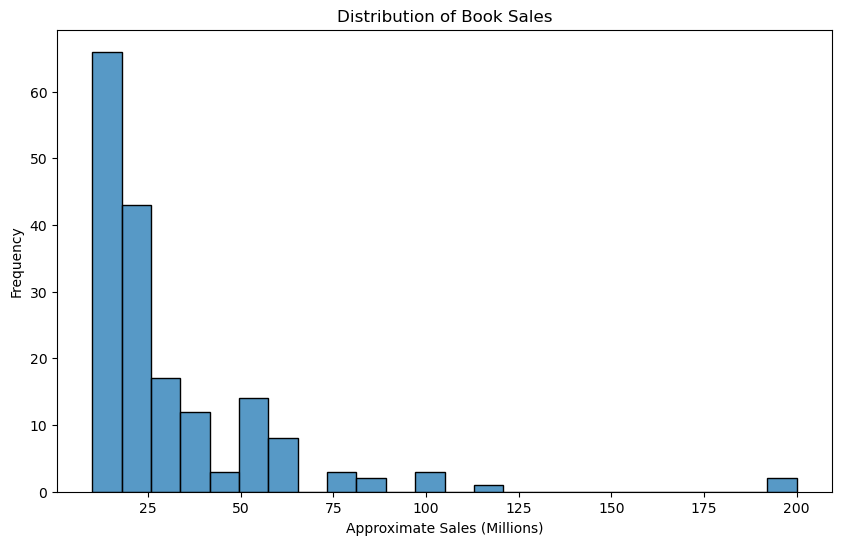

In [21]:
# Distribution of book sales
plt.figure(figsize=(10, 6))
sns.histplot(df["Approximate sales in millions"])
plt.xlabel("Approximate Sales (Millions)")
plt.ylabel("Frequency")
plt.title("Distribution of Book Sales")
plt.show()

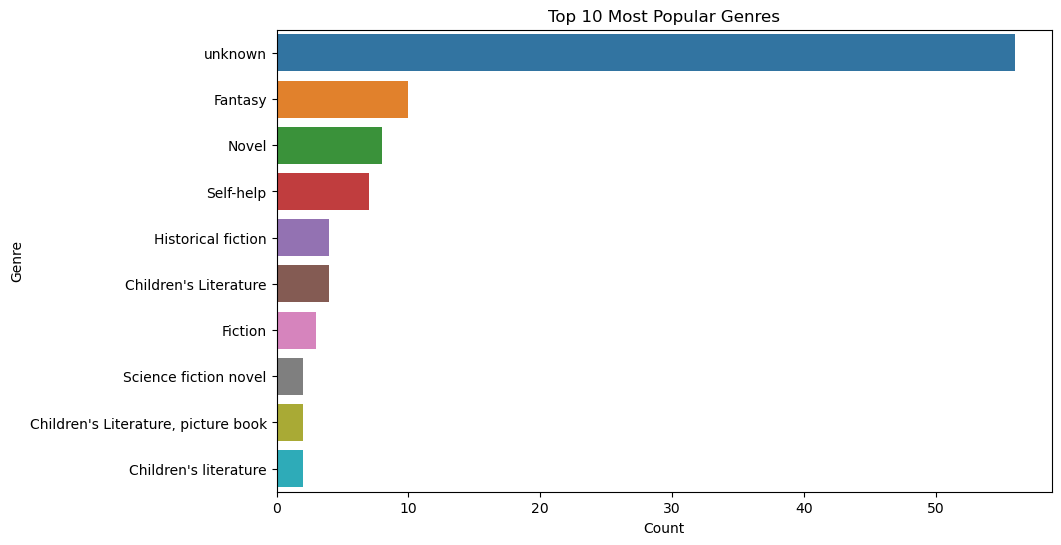

In [17]:
# Most popular genres
plt.figure(figsize=(10, 6))
genre_counts = df["Genre"].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Top 10 Most Popular Genres")
plt.show()

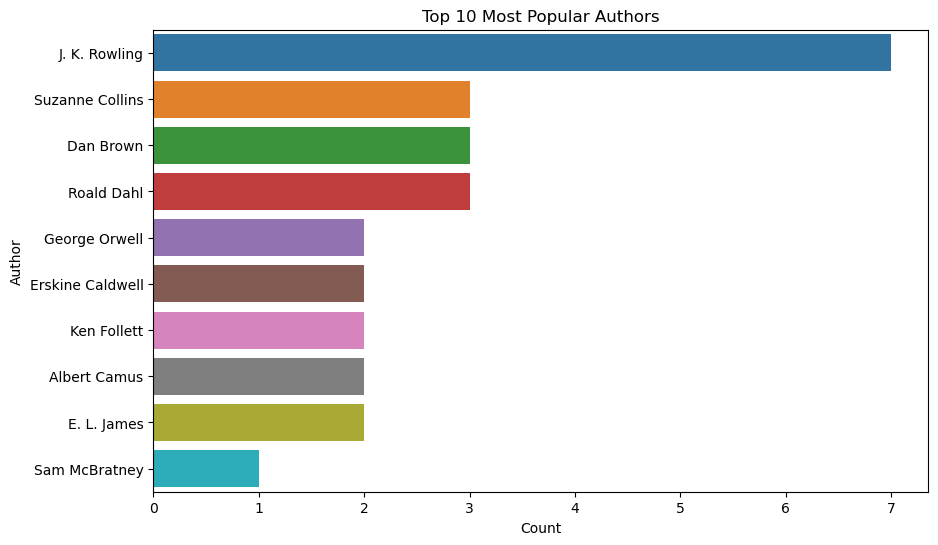

In [18]:
# Most popular authors
plt.figure(figsize=(10, 6))
author_counts = df["Author(s)"].value_counts().head(10)
sns.barplot(x=author_counts.values, y=author_counts.index)
plt.xlabel("Count")
plt.ylabel("Author")
plt.title("Top 10 Most Popular Authors")
plt.show()

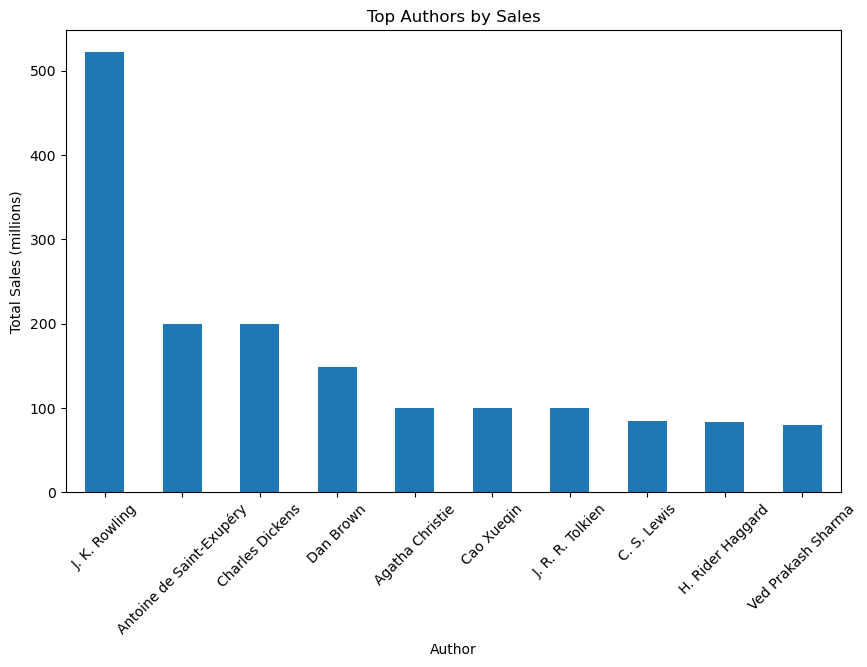

In [24]:
#Bar chart of top authors by sales
top_authors = df.groupby('Author(s)')['Approximate sales in millions'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.xlabel('Author')
plt.ylabel('Total Sales (millions)')
plt.title('Top Authors by Sales')
plt.xticks(rotation=45)
plt.show()

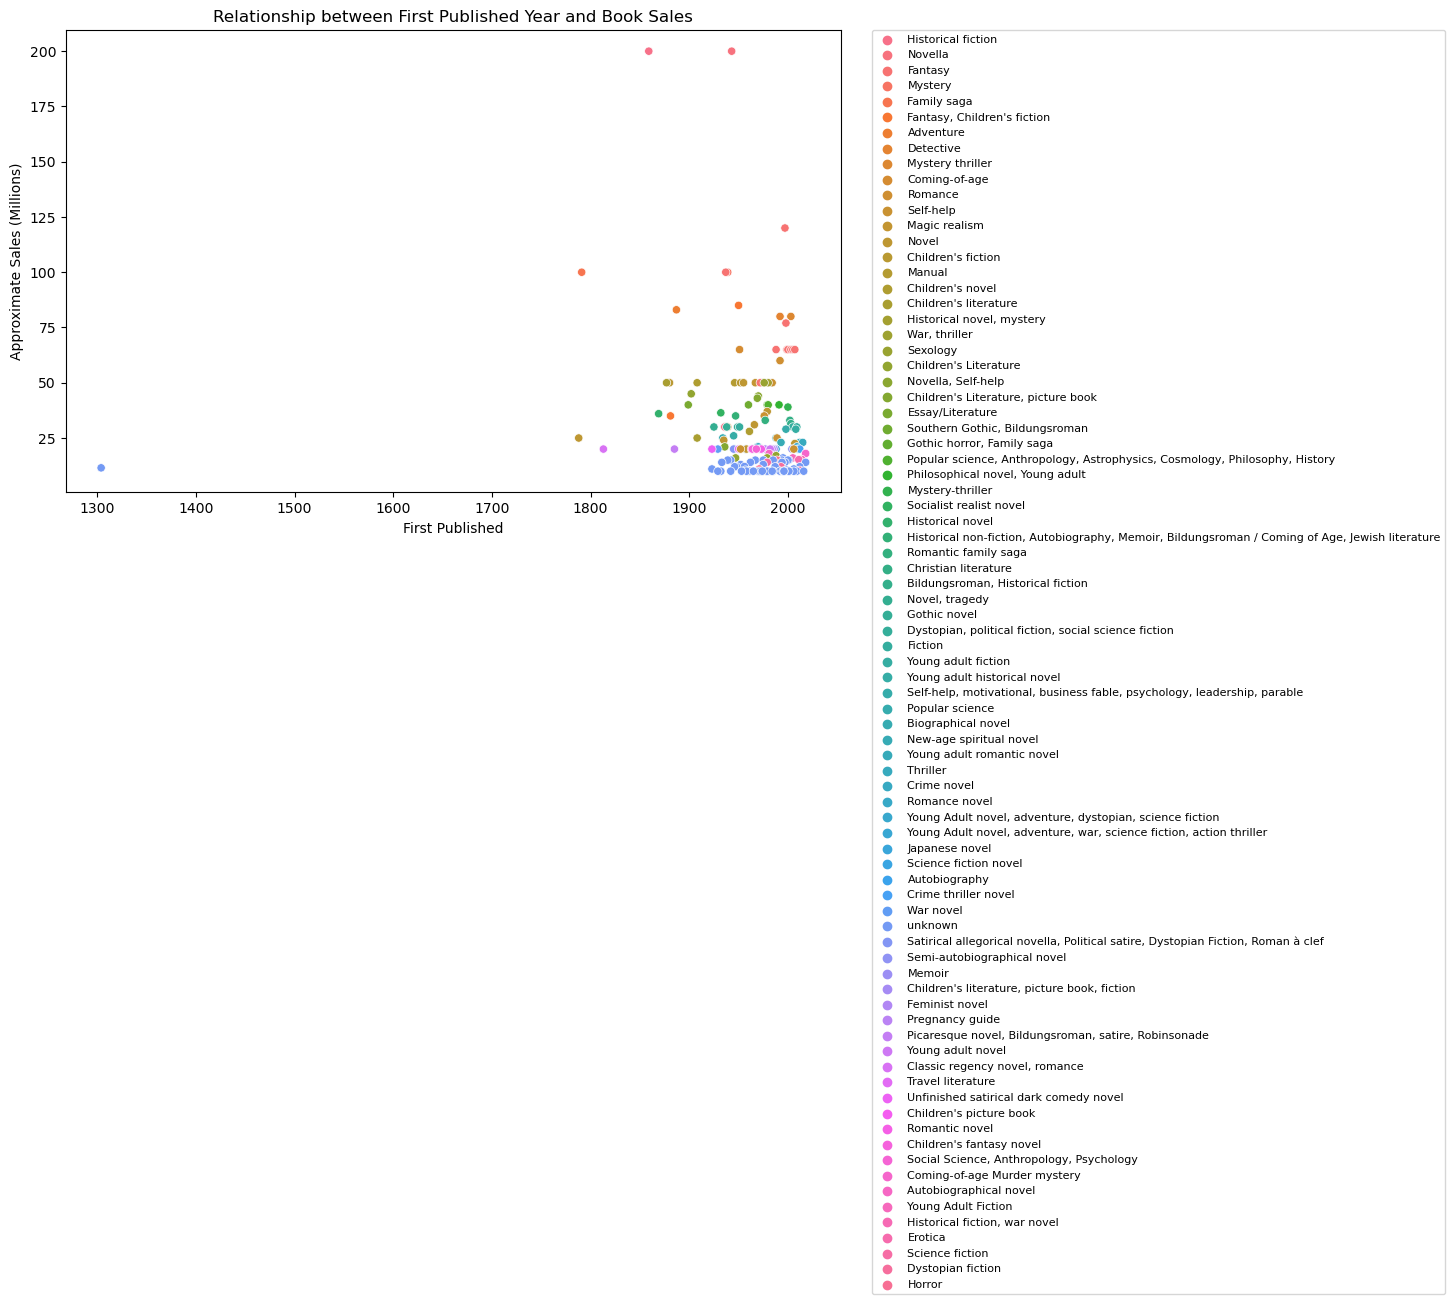

In [20]:
# Relationship between variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x="First published", y="Approximate sales in millions", hue="Genre", data=df)
plt.xlabel("First Published")
plt.ylabel("Approximate Sales (Millions)")
plt.title("Relationship between First Published Year and Book Sales")
plt.legend( bbox_to_anchor=(1.04, 1), borderaxespad=0, fontsize=8, facecolor='white')
plt.show()

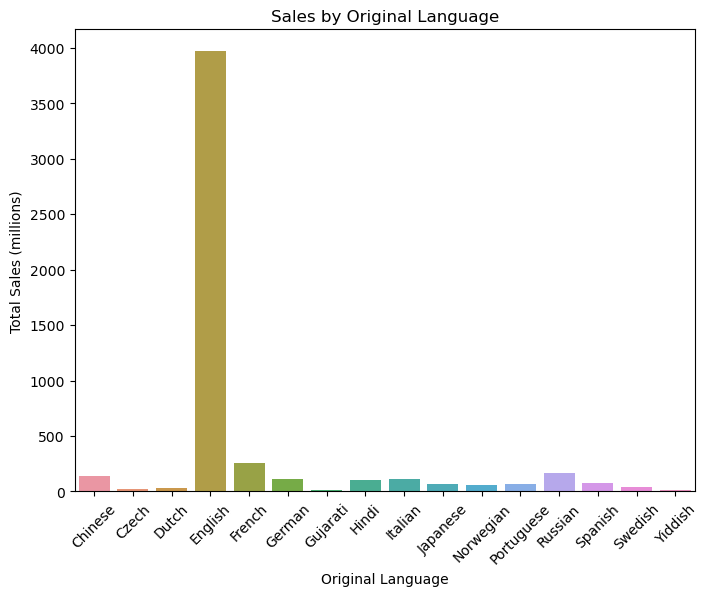

In [23]:
sales_by_language = df.groupby('Original language')['Approximate sales in millions'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_language, x='Original language', y='Approximate sales in millions')
plt.xlabel('Original Language')
plt.ylabel('Total Sales (millions)')
plt.title('Sales by Original Language')
plt.xticks(rotation=45)
plt.show()